## Group combining logic:
* Find top 10 words for groups which have observations more than 80 (88% of the data) and top 5 words for groups which have observations lower than 80 using wordcloud.
* Each group (GRP_0 to GRP_73) will be represented by their top words
* Use k-means clustering to combine groups with similar top words (vectorization using count vectorizer). 
* Tried with both 30 and 40 clusters 
* Almost all the major groups have been assigned individual clusters

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [202]:
dfs = pd.read_excel("input_data.xlsx")

In [203]:
dfs.head(20)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager name)_x000D_\n-checked the user name in ad and reset the password._x000D_\n-advised the user to login and check._x000D_\n-caller confirmed that he was able to login._x000D_\n-issue resolved.,spxjnwir pjlcoqds,GRP_0
1,outlook,"_x000D_\n_x000D_\nreceived from: hmjdrvpb.komuaywn@gmail.com_x000D_\n_x000D_\nhello team,_x000D_\n_x000D_\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_\n_x000D_\nkind",hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqkwiam@gmail.com_x000D_\n_x000D_\nhi_x000D_\n_x000D_\ni cannot log on to vpn_x000D_\n_x000D_\nbest,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0
6,event: critical:HostName_221.company.com the value of mountpoint threshold for /oracle/SID_37/erpdata21/,"event: critical:HostName_221.company.com the value of mountpoint threshold for /oracle/SID_37/erpdata21/sr3psa1d_7/sr3psa1d.data7,perpsr3psa1d,4524 is 98",jyoqwxhz clhxsoqy,GRP_1
7,ticket_no1550391- employment status - new non-employee [enter user's name],ticket_no1550391- employment status - new non-employee [enter user's name],eqzibjhw ymebpoih,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0


In [204]:
dfs["Assignment group"].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
GRP_31      69
GRP_7       68
GRP_34      62
GRP_26      56
GRP_40      45
GRP_28      44
GRP_41      40
GRP_30      39
GRP_15      39
GRP_42      37
GRP_20      36
GRP_45      35
GRP_1       31
GRP_22      31
GRP_11      30
GRP_21      29
GRP_47      27
GRP_48      25
GRP_23      25
GRP_62      25
GRP_60      20
GRP_39      19
GRP_27      18
GRP_37      16
GRP_44      15
GRP_36      15
GRP_50      14
GRP_65      11
GRP_53      11
GRP_52       9
GRP_55       8
GRP_51       8
GRP_46       6
GRP_49       6
GRP_59       6
GRP_43       5
GRP_66       4
GRP_32       4
GRP_58       3
GRP_56       3
GRP_68       3
GRP_38       3
GRP_63       3
GRP_69       2
GRP_54       2
GRP_72       2
GRP_57    

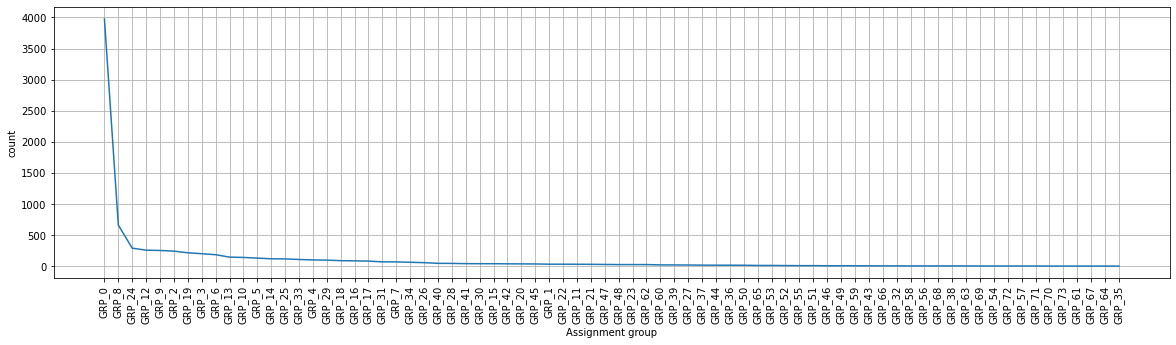

In [205]:
plt.subplots(figsize = (20,5))
plt.xticks(rotation=90)
plt.plot(dfs["Assignment group"].value_counts())
plt.xlabel("Assignment group")
plt.ylabel("count")
plt.grid()
plt.show()

In [206]:
dfs.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [207]:
dfs[dfs.isnull().any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,"_x000D_\n_x000D_\nreceived from: ohdrnswl.rezuibdt@gmail.com_x000D_\n_x000D_\nhi,_x000D_\n_x000D_\n_x000D_\n_x000D_\nlink is not working. kindly resolve yhe issue on urgent basis._x000D_\n_x000D_\n_x000D_\n_x000D_\nbest",ohdrnswl rezuibdt,GRP_34
3383,NaN,_x000D_\n-connected to the user system using teamviewer._x000D_\n-help the user login to the portal._x000D_\n-issue resolved.,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn._x000D_\n-connected to the user system using teamviewer._x000D_\n-help the user login to the company vpn using the vpn company vpn link._x000D_\n-issue resolved.,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn._x000D_\n-connected to the user system using teamviewer._x000D_\n-help the user login to the company vpn using the vpn company vpn link._x000D_\n-issue resolved.,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn._x000D_\n-connected to the user system using teamviewer._x000D_\n-help the user login to the company vpn using the vpn company vpn link._x000D_\n-issue resolved.,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn._x000D_\n-connected to the user system using teamviewer._x000D_\n-help the user login to the company vpn using the vpn company vpn link._x000D_\n-issue resolved.,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvqgbdhm.fwchqjor@gmail.com\ncustomer number:\ntelephone:-not available\nsummary:can't get into vpn - need to be on at 4:30 est and it wont' happen please help aerp!,wvqgbdhm fwchqjor,GRP_0
4341,NaN,"_x000D_\n_x000D_\nreceived from: eqmuniov.ehxkcbgj@gmail.com_x000D_\n_x000D_\ngood morning,_x000D_\n_x000D_\nwhen trying to log on to erp i get this error below._x000D_\nplease help urgently as i can not process customer order._x000D_\n_x000D_\n[cid:image001.png@01d20f2e.751db880]_x000D_\n_x000D_\n_x000D_\n",eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [208]:
duplicate_df=dfs[dfs.duplicated(subset = None, keep = 'first')]

In [209]:
duplicate_df.shape

(83, 4)

In [210]:
#duplicate_df

In [211]:
#drop NaNs and duplicate rows
dfs.dropna(inplace=True)

In [212]:
dfs.shape

(8491, 4)

In [213]:
dfs.drop_duplicates(subset = None, keep = 'first',inplace=True)

In [214]:
dfs.shape

(8408, 4)

In [215]:
dfs.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager name)_x000D_\n-checked the user name in ad and reset the password._x000D_\n-advised the user to login and check._x000D_\n-caller confirmed that he was able to login._x000D_\n-issue resolved.,spxjnwir pjlcoqds,GRP_0
1,outlook,"_x000D_\n_x000D_\nreceived from: hmjdrvpb.komuaywn@gmail.com_x000D_\n_x000D_\nhello team,_x000D_\n_x000D_\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_\n_x000D_\nkind",hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqkwiam@gmail.com_x000D_\n_x000D_\nhi_x000D_\n_x000D_\ni cannot log on to vpn_x000D_\n_x000D_\nbest,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [216]:
#preprocess and clean the data
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

#define a function for preprocessing the data
def preprocess_text(df, column_name=''):
    
    # Remove email Ids
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]{2,4}',' ',x))
    
    # Remove label url link
    df[column_name]=df[column_name].apply(lambda x: re.sub(r'urlLink|urllink','',x))
    
    # remove all the places where that starts with http or https
    df[column_name]=df[column_name].apply(lambda x: re.sub(r'https?\S+','',x))   
    
    df[column_name] = df[column_name].apply((lambda x: re.sub(r'([xx]+)|([XX]+)|(\d+)', '',x)))
    df[column_name] = df[column_name].apply((lambda x: re.sub(r'[_D_\n_D_\n]', '',x)))


    
    # Strip unwanted spaces
    df[column_name] = df[column_name].apply(lambda x: x.strip())
    
    # Select only alphabets
    df[column_name] = df[column_name].apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))
  
    # Convert text to lowercase
    df[column_name] = df[column_name].apply(lambda x: x.lower())

    # Remove stopwords
    df[column_name] = df[column_name].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

    #Remove hello
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'hello |please |received |unable |see |help |received |need |sent |yes |no |na ', ' ', x))
    
    # Replace empty strings with Null
    df[column_name].replace('', np.nan, inplace = True)
    
    # Drop Null values
    df = df.dropna()

    return df


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sango\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [217]:
dfs = preprocess_text(dfs, column_name='Description')

In [218]:
dfs = preprocess_text(dfs, column_name='Short description')

In [219]:
##### Another built in function to pre-process the text with stemming, lemmitization and others
#stemming was leading to invalid words like 'unabl', issu','verifi' etc. Hence used lematization only

nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def lemmitize(sentence):
    sentence=str(sentence)
    # sentence = sentence.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)  
    # filtered_words = [w for w in tokens if len(w) >= 2 if not w in stopwords.words('english')]
    #stem_words = [stemmer.stem(w) for w in tokens]
    lemma_words = [lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(lemma_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sango\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sango\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [220]:
dfs['Short description'] = dfs['Short description'].apply(lambda s:lemmitize(s))

In [221]:
dfs['Description'] = dfs['Description'].apply(lambda s:lemmitize(s))

In [222]:
dfs.head(20)

,Short description,Description,Caller,Assignment group
0,login issue,verified user detail employee manager name checked user name ad reset password advised user login check caller confirmed able login issue resolved,spxjnwir pjlcoqds,GRP_0
1,outlook,team meeting skype meeting etc appearing outlook calendar somebody advise correct kind,hmjdrvpb komuaywn,GRP_0
2,cant log vpn,hii cannot log vpnbest,eylqgodm ybqkwiam,GRP_0
3,access hrtool page,access hrtool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
5,log engineering tool skype,log engineering tool skype,eflahbxn ltdgrvkz,GRP_0
6,event critical hostname company com value mountpoint threshold oracle si erpdata,event critical hostname company com value mountpoint threshold oracle si erpdata srpsad srpsad data perpsrpsad,jyoqwxhz clhxsoqy,GRP_1
7,ticket employment status new non employee enter user name,ticket employment status new non employee enter user name,eqzibjhw ymebpoih,GRP_0
8,disable add in outlook,disable add in outlook,mdbegvct dbvichlg,GRP_0
9,ticket update inplant,ticket update inplant,fumkcsji sarmtlhy,GRP_0


In [223]:
dfs.shape

(8310, 4)

In [224]:
## Group by Categories
df_grp = dfs.groupby(['Assignment group']).size().reset_index(name='counts')
df_grp

,Assignment group,counts
0,GRP_0,3919
1,GRP_1,31
2,GRP_10,140
3,GRP_11,30
4,GRP_12,257
5,GRP_13,144
6,GRP_14,118
7,GRP_15,38
8,GRP_16,85
9,GRP_17,25


In [225]:
#concatenate the columns Short Description and Description
#Before concatenating, if Description and Short Description have same text, make Description column blank
for i in range(len(dfs)):
    if(dfs.iloc[i, 0]== dfs.iloc[i, 1]):
        dfs.iloc[i,1]="" 

dfs["issue_description"]=dfs["Short description"] + " " + dfs["Description"]
#dfs= pd.DataFrame({"issue_description": dfs["Short description"] + " " + dfs["Description"],"Assignment group": dfs["Assignment group"]}, 
                                                       #columns=["issue_description","Assignment group"])

In [226]:
dfs.head(20)

,Short description,Description,Caller,Assignment group,issue_description
0,login issue,verified user detail employee manager name checked user name ad reset password advised user login check caller confirmed able login issue resolved,spxjnwir pjlcoqds,GRP_0,login issue verified user detail employee manager name checked user name ad reset password advised user login check caller confirmed able login issue resolved
1,outlook,team meeting skype meeting etc appearing outlook calendar somebody advise correct kind,hmjdrvpb komuaywn,GRP_0,outlook team meeting skype meeting etc appearing outlook calendar somebody advise correct kind
2,cant log vpn,hii cannot log vpnbest,eylqgodm ybqkwiam,GRP_0,cant log vpn hii cannot log vpnbest
3,access hrtool page,,xbkucsvz gcpydteq,GRP_0,access hrtool page
4,skype error,,owlgqjme qhcozdfx,GRP_0,skype error
5,log engineering tool skype,,eflahbxn ltdgrvkz,GRP_0,log engineering tool skype
6,event critical hostname company com value mountpoint threshold oracle si erpdata,event critical hostname company com value mountpoint threshold oracle si erpdata srpsad srpsad data perpsrpsad,jyoqwxhz clhxsoqy,GRP_1,event critical hostname company com value mountpoint threshold oracle si erpdata event critical hostname company com value mountpoint threshold oracle si erpdata srpsad srpsad data perpsrpsad
7,ticket employment status new non employee enter user name,,eqzibjhw ymebpoih,GRP_0,ticket employment status new non employee enter user name
8,disable add in outlook,,mdbegvct dbvichlg,GRP_0,disable add in outlook
9,ticket update inplant,,fumkcsji sarmtlhy,GRP_0,ticket update inplant


### ADD a column containing lenth of sentences

In [227]:
dfs['description_length'] = dfs.issue_description.str.split().str.len()

In [228]:
dfs['description_length'].max()

1000

In [229]:
dfs['description_length'].mean()

18.65282791817088

In [230]:
dfs['description_length'].quantile([0,.95])

0.00     1.0
0.95    60.0
Name: description_length, dtype: float64

In [231]:
!pip install wordcloud
import heapq
from wordcloud import WordCloud
## function to create Word Cloud
def show_wordcloud(data, groupName, n_words):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))
    
    #print(list(wordcloud.words_.keys())[0:n_words])
    return list(wordcloud.words_.keys())[0:n_words]
                

"""
    #type(wordcloud.words_.keys())
    print("Top words are: ", list(wordcloud.words_.keys())[0: 10])
    
    fig = plt.figure(1, figsize=(15, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
    
    rel_freq=wordcloud.words_
    
    names = list(rel_freq.keys())
    values = list(rel_freq.values())
    #plt.rcParams["figure.figsize"] = (10, 5)
    plt.bar(range(20), values[:20], tick_label=names[:20])
    plt.xticks(rotation=90)
    plt.title(groupName + " top word count")
    plt.show()
"""

'\n    #type(wordcloud.words_.keys())\n    print("Top words are: ", list(wordcloud.words_.keys())[0: 10])\n    \n    fig = plt.figure(1, figsize=(15, 12))\n    plt.axis(\'off\')\n    if title: \n        fig.suptitle(title, fontsize=20)\n        fig.subplots_adjust(top=2.3)\n\n    plt.imshow(wordcloud)\n    plt.show()\n    \n    \n    rel_freq=wordcloud.words_\n    \n    names = list(rel_freq.keys())\n    values = list(rel_freq.values())\n    #plt.rcParams["figure.figsize"] = (10, 5)\n    plt.bar(range(20), values[:20], tick_label=names[:20])\n    plt.xticks(rotation=90)\n    plt.title(groupName + " top word count")\n    plt.show()\n'

In [232]:
df_grp["top_words"] = ""
for i in range(len(df_grp)):
    groupName=df_grp.iloc[i,0]
    if(df_grp.iloc[i,1]>=80):
        #print(groupName,":\n")
        text_Str1 = dfs['issue_description'][dfs['Assignment group'].isin([groupName])].tolist()
        df_grp['top_words'][i]=show_wordcloud(text_Str1, groupName,n_words= 10)    
    else:
        text_Str1 = dfs['issue_description'][dfs['Assignment group'].isin([groupName])].tolist()
        df_grp['top_words'][i]=show_wordcloud(text_Str1, groupName, n_words=5)  

<ipython-input-232-31614f54e57b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grp['top_words'][i]=show_wordcloud(text_Str1, groupName,n_words= 10)
<ipython-input-232-31614f54e57b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grp['top_words'][i]=show_wordcloud(text_Str1, groupName, n_words=5)


In [233]:
df_grp

,Assignment group,counts,top_words
0,GRP_0,3919,"[password reset, access, outlook, erp si, erp, issue, email, vpn, reset password, account locked]"
1,GRP_1,31,"[hostname, space consumed, consumed space, space available, job]"
2,GRP_10,140,"[failed jobscheduler, jobscheduler job, job hrpayrollnau, hrpayrollnau failed, erp, inwarehousetool, job job, job failed, account, payment]"
3,GRP_11,30,"[erp, engineering tool, drawing, plm, material]"
4,GRP_12,257,"[hostname, server, asa deny, deny tcp, tcp src, src inside, inside dst, dst outside, outside access, access group]"
5,GRP_13,144,"[inwarehousetool, order, erp, customer, item, issue, workflow, error, delivery, cannot]"
6,GRP_14,118,"[erp, hostname, si, issue, server, error, system, production, alwaysupservice ee, team]"
7,GRP_15,38,"[crm, account, employee, erp crm, email]"
8,GRP_16,85,"[collaborationplatform, access, file, user, issue, hub, company, link, email, site]"
9,GRP_17,25,"[reset password, password reset, passwordmanagementtool password, using passwordmanagementtool, erp]"


In [234]:
df_grp['top_words']=df_grp['top_words'].apply(lambda x:' '.join(str(e)for e in x))

In [235]:
df_grp.head()

,Assignment group,counts,top_words
0,GRP_0,3919,password reset access outlook erp si erp issue email vpn reset password account locked
1,GRP_1,31,hostname space consumed consumed space space available job
2,GRP_10,140,failed jobscheduler jobscheduler job job hrpayrollnau hrpayrollnau failed erp inwarehousetool job job job failed account payment
3,GRP_11,30,erp engineering tool drawing plm material
4,GRP_12,257,hostname server asa deny deny tcp tcp src src inside inside dst dst outside outside access access group


In [236]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer_cv = CountVectorizer(analyzer='word')
X_cv = vectorizer_cv.fit_transform(df_grp['top_words'])

In [237]:
matrix=pd.concat([df_grp['top_words'],pd.DataFrame(X_cv.toarray(), columns=vectorizer_cv.get_feature_names_out())], axis=1)
matrix

,top_words,abended,access,account,aclinside,admin,agent,ahrskvlnregional,alert,alwaysupservice,analytics,android,anftgup,apac,app,asa,assignment,available,baadea,backup,batch,bitte,bobj,calibration,call,cannot,card,change,charm,cid,circuit,client,co,collaborationplatform,com,company,complete,computer,confirmation,consumed,contact,cost,course,create,crm,customer,cutview,data,database,datacenter,de,defekt,delete,delivery,deny,deployment,der,dev,die,disk,distributortool,dn,dob,drawing,drucker,dst,ec,edi,ee,em,email,emea,employee,engg,engineering,engineeringtool,enter,epense,erp,error,et,ethic,eutool,event,ewew,failed,file,finance,financeapp,fnqelwpk,folder,following,forbidden,forecast,galay,germany,gkad,globaltelecom,gr,group,ha,hgaycze,hgayczeing,host,hostname,hpqc,hrpayrollnau,hub,id,ie,ignore,inside,install,inwarehousetool,ip,issue,item,job,jobscheduler,kp,laptop,lauacyltoe,link,locked,login,mail,maintenance,manager,material,medium,message,michjnfyele,mii,missing,mit,mm,monitoringtool,name,network,new,nicht,note,number,oneteam,order,outage,outlook,outside,page,password,passwordmanagementtool,payment,pc,per,phone,plant,plm,po,portal,pr,price,print,printer,pro,problem,probleme,processor,product,production,purchasing,pz,quote,rechner,rejected,report,required,reset,responding,running,say,schedule,scheduled,search,selector,send,sep,server,setup,ship,shipping,shopfloorapp,si,sicold,sinkhole,site,skype,slow,space,src,srvlavpwdrprd,sso,sto,stock,stopped,submit,sw,switch,symantec,system,tcp,team,telecomvendor,telephonysoftware,ticket,ticketingtool,time,tool,training,tried,type,uacyltoe,und,update,usa,user,using,version,via,virus,vpn,wg,wifi,workflow,working,www
0,password reset access outlook erp si erp issue email vpn reset password account locked,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,hostname space consumed consumed space space available job,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,failed jobscheduler jobscheduler job job hrpayrollnau hrpayrollnau failed erp inwarehousetool job job job failed account payment,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,erp engineering tool drawing plm material,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,hostname server asa deny deny tcp tcp src src inside inside dst dst outside outside access access group,0,2,0,0,0,0,0,0,

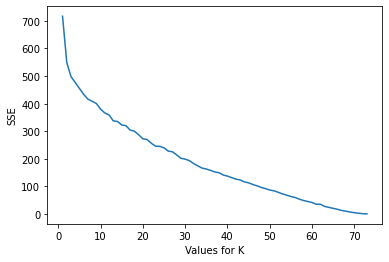

In [238]:
from sklearn.cluster import KMeans
sse={}
for k in np.arange(1,74):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_cv)
    sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel('Values for K')
plt.ylabel('SSE')
plt.show();

In [239]:
kmeans_30 = KMeans(n_clusters=30, random_state=42)
kmeans_30.fit(X_cv)
#final_cluster = pd.concat([df_grp,pd.DataFrame(X_cv.toarray(),columns=vectorizer_cv.get_feature_names_out())],axis=1)
df_grp['cluster_30'] = kmeans_30.predict(X_cv)

In [240]:
kmeans_40 = KMeans(n_clusters=40, random_state=42)
kmeans_40.fit(X_cv)
#final_cluster = pd.concat([df_grp,pd.DataFrame(X_cv.toarray(),columns=vectorizer_cv.get_feature_names_out())],axis=1)
df_grp['cluster_40'] = kmeans_40.predict(X_cv)

In [241]:
df_grp

,Assignment group,counts,top_words,cluster_30,cluster_40
0,GRP_0,3919,password reset access outlook erp si erp issue email vpn reset password account locked,19,13
1,GRP_1,31,hostname space consumed consumed space space available job,7,15
2,GRP_10,140,failed jobscheduler jobscheduler job job hrpayrollnau hrpayrollnau failed erp inwarehousetool job job job failed account payment,18,4
3,GRP_11,30,erp engineering tool drawing plm material,2,28
4,GRP_12,257,hostname server asa deny deny tcp tcp src src inside inside dst dst outside outside access access group,4,23
5,GRP_13,144,inwarehousetool order erp customer item issue workflow error delivery cannot,26,17
6,GRP_14,118,erp hostname si issue server error system production alwaysupservice ee team,16,14
7,GRP_15,38,crm account employee erp crm email,17,24
8,GRP_16,85,collaborationplatform access file user issue hub company link email site,5,27
9,GRP_17,25,reset password password reset passwordmanagementtool password using passwordmanagementtool erp,6,22


In [242]:
final_cluster_30= pd.pivot_table(df_grp, index=['cluster_30','Assignment group'], values='counts', aggfunc=np.sum)

In [243]:
final_cluster_30

counts
cluster_30 Assignment group        
0          GRP_20                36
           GRP_41                40
           GRP_45                35
1          GRP_65                11
2          GRP_11                30
           GRP_21                28
           GRP_26                56
           GRP_27                18
           GRP_28                44
           GRP_30                21
           GRP_31                60
           GRP_32                 4
           GRP_35                 1
           GRP_36                15
           GRP_39                19
           GRP_43                 5
           GRP_46                 6
           GRP_48                 6
           GRP_49                 6
           GRP_50                14
           GRP_54                 2
           GRP_55                 8
           GRP_56                 3
           GRP_57                 2
           GRP_58                 3
           GRP_59                 6
           GRP_61                 1
           GRP_62                25
           GRP_64                 1
           GRP_66                 4
           GRP_67                 1
           GRP_69                 2
           GRP_70                 1
           GRP_71                 2
           GRP_72                 2
           GRP_73                 1
3          GRP_6                183
           GRP_9                252
4          GRP_12               257
5          GRP_16                85
6          GRP_17                25
7          GRP_1                 31
8          GRP_19               215
           GRP_3                200
9          GRP_18                88
10         GRP_24               285
11         GRP_33               107
           GRP_42                37
12         GRP_8                645
13         GRP_5                128
14         GRP_53                11
15         GRP_47                27
           GRP_60                16
16         GRP_14               118
17         GRP_15                38
           GRP_22                31
           GRP_38                 3
           GRP_40                45
           GRP_44                15
           GRP_63                 3
18         GRP_10               140
19         GRP_0               3919
20         GRP_4                100
21         GRP_23                25
22         GRP_51                 8
23         GRP_25               116
24         GRP_2                241
25         GRP_29                96
26         GRP_13               144
27         GRP_52                 9
           GRP_68                 3
28         GRP_37                16
           GRP_7                 68
29         GRP_34                61

In [244]:
final_cluster_40= pd.pivot_table(df_grp, index=['cluster_40','Assignment group'],  values='counts', aggfunc=np.sum)

In [245]:
final_cluster_40

counts
cluster_40 Assignment group        
0          GRP_24               285
1          GRP_36                15
2          GRP_43                 5
           GRP_45                35
3          GRP_2                241
4          GRP_10               140
5          GRP_37                16
           GRP_7                 68
6          GRP_26                56
           GRP_70                 1
7          GRP_49                 6
8          GRP_19               215
           GRP_3                200
9          GRP_5                128
10         GRP_21                28
           GRP_27                18
           GRP_28                44
           GRP_31                60
           GRP_32                 4
           GRP_35                 1
           GRP_39                19
           GRP_46                 6
           GRP_48                 6
           GRP_50                14
           GRP_54                 2
           GRP_55                 8
           GRP_56                 3
           GRP_57                 2
           GRP_58                 3
           GRP_59                 6
           GRP_62                25
           GRP_64                 1
           GRP_65                11
           GRP_69                 2
           GRP_71                 2
           GRP_73                 1
11         GRP_9                252
12         GRP_8                645
13         GRP_0               3919
14         GRP_14               118
15         GRP_1                 31
16         GRP_25               116
17         GRP_13               144
           GRP_20                36
           GRP_41                40
18         GRP_33               107
           GRP_42                37
19         GRP_61                 1
20         GRP_47                27
           GRP_60                16
21         GRP_44                15
22         GRP_17                25
23         GRP_12               257
24         GRP_15                38
           GRP_22                31
           GRP_38                 3
           GRP_40                45
           GRP_63                 3
25         GRP_30                21
26         GRP_18                88
27         GRP_16                85
28         GRP_11                30
29         GRP_4                100
30         GRP_52                 9
           GRP_68                 3
31         GRP_34                61
32         GRP_29                96
33         GRP_6                183
34         GRP_67                 1
35         GRP_53                11
36         GRP_72                 2
37         GRP_23                25
38         GRP_66                 4
39         GRP_51                 8

In [253]:
dfs.shape

(8310, 6)

## Testing the clustered groups with logistic regression model

In [254]:
df_temp=dfs.merge(df_grp, how='right', on="Assignment group")

In [255]:
df_temp.shape

(8310, 10)

In [256]:
df_temp.head()

,Short description,Description,Caller,Assignment group,issue_description,description_length,counts,top_words,cluster_30,cluster_40
0,login issue,verified user detail employee manager name checked user name ad reset password advised user login check caller confirmed able login issue resolved,spxjnwir pjlcoqds,GRP_0,login issue verified user detail employee manager name checked user name ad reset password advised user login check caller confirmed able login issue resolved,24,3919,password reset access outlook erp si erp issue email vpn reset password account locked,19,13
1,outlook,team meeting skype meeting etc appearing outlook calendar somebody advise correct kind,hmjdrvpb komuaywn,GRP_0,outlook team meeting skype meeting etc appearing outlook calendar somebody advise correct kind,13,3919,password reset access outlook erp si erp issue email vpn reset password account locked,19,13
2,cant log vpn,hii cannot log vpnbest,eylqgodm ybqkwiam,GRP_0,cant log vpn hii cannot log vpnbest,7,3919,password reset access outlook erp si erp issue email vpn reset password account locked,19,13
3,access hrtool page,,xbkucsvz gcpydteq,GRP_0,access hrtool page,3,3919,password reset access outlook erp si erp issue email vpn reset password account locked,19,13
4,skype error,,owlgqjme qhcozdfx,GRP_0,skype error,2,3919,password reset access outlook erp si erp issue email vpn reset password account locked,19,13


In [258]:
df1=df_temp[["issue_description","Assignment group","cluster_30","cluster_40"]]

In [263]:
df1.head()

,issue_description,Assignment group,cluster_30,cluster_40
0,login issue verified user detail employee manager name checked user name ad reset password advised user login check caller confirmed able login issue resolved,GRP_0,19,13
1,outlook team meeting skype meeting etc appearing outlook calendar somebody advise correct kind,GRP_0,19,13
2,cant log vpn hii cannot log vpnbest,GRP_0,19,13
3,access hrtool page,GRP_0,19,13
4,skype error,GRP_0,19,13


In [279]:
from sklearn.model_selection import train_test_split
X=df1['issue_description']
y=df1['cluster_30']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.30, random_state=42)

In [280]:
print(X_train.shape)
print(X_test.shape)

(5817,)
(2493,)


In [281]:
vec = CountVectorizer(binary=True, ngram_range=(1, 2))
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

In [282]:
len(vec.vocabulary_)

63264

In [283]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
#encode target variable
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test= encoder.fit_transform(y_test)

In [284]:
y_train

array([19, 19, 20, ...,  2, 19,  3], dtype=int64)

In [285]:
from sklearn import linear_model, naive_bayes, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import random

target_names = list(encoder.classes_) # output labels for report generation
def report_generation(classifier, train_data, test_data, train_y, y_test, average):
    
    classifier.fit(train_data, train_y)
    pred_test = classifier.predict(test_data)
    pred_inversed = encoder.inverse_transform(pred_test)
    y_test_inversed = encoder.inverse_transform(y_test)
    
    print("Accuracy :", metrics.accuracy_score(pred_test, y_test))
    report = classification_report(y_test, pred_test, output_dict=True, target_names=target_names,zero_division=1)
    
    print("Other metrics", report[average])
  
    if average == 'weighted avg':
        
           
        print("\n Some random test predictions \n")
        randomlist =random.sample(range(1, 2466), 10)
        for i in randomlist:
            print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
            X_test[i],
            (y_test_inversed[i]),
            (pred_inversed[i])))
    

In [286]:
 #Logistic Regression weighted average
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear')
report = report_generation(classifier, X_train_vec, X_test_vec, y_train, y_test,'weighted avg')
#print("Logistic Regression weighted avg Count Vectorizer Report", report['weighted avg'])

Accuracy : 0.6799037304452467
Other metrics {'precision': 0.6821059494296425, 'recall': 0.6799037304452467, 'f1-score': 0.6373267569575933, 'support': 2493}

 Some random test predictions 

Title:	outlook keine r ckmeldung outlooki able log outlook thiw morning restarted computer several time without effort
True labels:	19
Predicted labels:	19


Title:	download issue trying download software tooling report company dell keep getting error message assume someone take remote access computer going tommyth duyhurmontchannel partner sale engineercompany inc mailto www company com www company com engineeringtool en home html
True labels:	8
Predicted labels:	19


Title:	skype issue calling desk headset ooo skype error calling desk phone call number building fine kqelgbis stiarhlu also skype headset connected work switch pc speaker hear
True labels:	19
Predicted labels:	19


Title:	password reset 
True labels:	19
Predicted labels:	19


Title:	skype error logging 
True labels:	19
Predicted label

In [287]:
#svm weighted average
from sklearn.svm import SVC
classifier=SVC(gamma=0.01,C=10)
report = report_generation(classifier, X_train_vec, X_test_vec, y_train, y_test, 'weighted avg')
#print("svm weighted avg Count Vectorizer Report", report['weighted avg'])

Accuracy : 0.6718812675491376
Other metrics {'precision': 0.6761033546278203, 'recall': 0.6718812675491376, 'f1-score': 0.6184969906422544, 'support': 2493}

 Some random test predictions 

Title:	password reset jghjimdghty bfhjtuiwell monday august pmto nwfodmhc eurcwkmsubject amar jghjimdghty bfhjtuiwell window password epiring soon importance highhi changed vpn password morning prompted erp outlook go change per passwordmanagementtool pw software passwordmanagementtool pw accept self service login password old new email address
True labels:	19
Predicted labels:	19


Title:	user lndypaqg dhqwtcsr gogtyekthyto hat sein passwort erp si verggermany 
True labels:	19
Predicted labels:	19


Title:	eutool aktualisierung alle min l uft nicht 
True labels:	23
Predicted labels:	23


Title:	provide network access right fuydemo fntmbpla match tyyhtuler hiyhtull provide network access right fuydemo fntmbpla match tyyhtuler hiyhtull could provide network access right fuydemo fntmbpla match tyyhtul